In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="nandinichaturvedi"
os.environ['KAGGLE_KEY'] = "d5322bd88a80a577c5d9dad50799a172"

PAKISTAN DATASET UPLOAD

In [ ]:
!kaggle datasets download -d ebrahimhaquebhatti/75000-used-cars-dataset-with-specifications
!unzip 75000-used-cars-dataset-with-specifications.zip

In [ ]:
dataPak = pd.read_csv('/content/PakWheelsDataSet.csv')

INDIA DATASET UPLOAD


In [ ]:
#India dataset
!kaggle datasets download -d manishkr1754/cardekho-used-car-data
!unzip cardekho-used-car-data.zip

In [ ]:
dataIndia = pd.read_csv('cardekho_dataset.csv')

GERMANY DATASET UPLOAD

In [ ]:
#Geramny dataset
!kaggle datasets download -d ander289386/cars-germany
!unzip cars-germany.zip

  0% 0.00/498k [00:00<?, ?B/s]
100% 498k/498k [00:00<00:00, 102MB/s]
Archive:  cars-germany.zip
  inflating: autoscout24-germany-dataset.csv  


In [ ]:
dataGermany = pd.read_csv('/content/autoscout24-germany-dataset.csv')

DATA CLEANING (PAKISTAN DATASET)

In [ ]:

dataPak = dataPak.drop("Unnamed: 0", axis=1)



In [ ]:
dataPak.head(5)

,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),City,Year,Price
0,Honda,BR-V i-VTEC S,Automatic,Petrol,1500.00,41371,Karachi,2017,3150000.00
1,Toyota,Corolla Altis Automatic 1.6,Automatic,Petrol,1600.00,2460,Karachi,2021,3575000.00
2,Toyota,Vitz F Limited II 1.0,Automatic,Petrol,1000.00,67000,Karachi,2014,1955000.00
3,Daihatsu,Move Custom X Limited,Automatic,Petrol,660.00,64000,Lahore,2013,1450000.00
4,Toyota,Prado TX L Package 2.7,Automatic,Petrol,2700.00,64000,Lahore,2016,19000000.00


In [ ]:
dataPak.shape

(76690, 9)

In [ ]:
null=dataPak.isnull().sum()
print(null)

Make                   0
Name                   0
Transmission           0
Engine Type            0
Engine Capacity(CC)    3
Mileage(kms)           0
City                   0
Year                   0
Price                  0
dtype: int64


In [ ]:
dataPak=dataPak.dropna()


In [ ]:
newnull=dataPak.isnull().sum()
print(newnull)

Make                   0
Name                   0
Transmission           0
Engine Type            0
Engine Capacity(CC)    0
Mileage(kms)           0
City                   0
Year                   0
Price                  0
dtype: int64


In [ ]:
dataPak.shape

(76687, 9)

In [ ]:
dataPak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76687 entries, 0 to 76689
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 76687 non-null  object 
 1   Name                 76687 non-null  object 
 2   Transmission         76687 non-null  object 
 3   Engine Type          76687 non-null  object 
 4   Engine Capacity(CC)  76687 non-null  float64
 5   Mileage(kms)         76687 non-null  int64  
 6   City                 76687 non-null  object 
 7   Year                 76687 non-null  int64  
 8   Price                76687 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 5.9+ MB


In [ ]:
dataPak.describe()

,Engine Capacity(CC),Mileage(kms),Year,Price
count,76687.00,76687.00,76687.00,76687.00
mean,1499.70,87962.01,2012.00,3023152.87
std,723.37,78759.33,7.37,4303288.75
min,16.00,1.00,1940.00,500000.00
25%,1000.00,39000.00,2007.00,1215000.00
50%,1300.00,79900.00,2014.00,2025000.00
75%,1800.00,119800.00,2018.00,3200000.00
max,6603.00,999999.00,2021.00,93500000.00


In [ ]:
dataPak= dataPak.dropna(subset=['Price','Mileage(kms)','Year','City','Make','Transmission','Engine Capacity(CC)']).drop_duplicates(keep='first')
dataPak.shape


(70480, 9)

OUTLIERS CALCULATION

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'dataPak'

# List of numeric columns to process
numeric_columns = ['Price', 'Mileage(kms)', 'Year', 'Engine Capacity(CC)']

def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers in specified numeric columns
dataPak_cleaned = remove_outliers_iqr(dataPak, numeric_columns)


In [ ]:
dataPak.shape

(58010, 9)

MEAN - MEDIAN OF THE DATASET

In [ ]:
# Calculate the mean and median of the prices
mean_price =dataPak['Price'].mean()
median_price = dataPak['Price'].median()

# Print the results
print(f"Mean Price in PKR: {mean_price:.2f}")
print(f"Median Price in PKR: {median_price:.2f}")

Mean Price in PKR: 1996205.02
Median Price in PKR: 1800000.00


DATA CLEANING (INDIA DATASET)

In [ ]:
dataIndia = dataIndia.drop("Unnamed: 0", axis=1)

In [ ]:
dataIndia.head(5)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
dataIndia.shape

(15411, 13)

In [ ]:
null= dataIndia.isnull().sum()
print(null)

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


SINCE NO NULL VALUES ARE PRESENT WE DO NOT NEED TO DROP ANY DATA VALUES

In [ ]:
dataIndia.shape

(15411, 14)

In [ ]:
dataIndia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


OUTLIERS REMOVE

In [ ]:
threshold = 1.5


new_India_data= pd.DataFrame()

for col in dataIndia.select_dtypes(include=['number']):

    Q1 = dataIndia[col].quantile(0.25)
    Q3 = dataIndia[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR


    new_India_data[col] = dataIndia[(dataIndia[col] >= lower_bound) & (dataIndia[col] <= upper_bound)][col]


new_India_data.reset_index(drop=True, inplace=True)


new_India_data.to_csv('cleaned_dataset.csv', index=False)

MEAN - MEDIAN FOR INDIA DATASET

In [ ]:
# Calculate the mean and median of the prices
mean_price =dataIndia['selling_price'].mean()
median_price = dataIndia['selling_price'].median()

# Print the results
print(f"Mean Price in Rs.: {mean_price:.2f}")
print(f"Median Price in Rs.: {median_price:.2f}")

Mean Price in Rs.: 774971.12
Median Price in Rs.: 556000.00


DATA CLEANING(GERMANY DATASET)

In [ ]:
dataGermany.head(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [ ]:
dataGermany.shape

(46405, 9)

In [ ]:
null=dataGermany.isnull().sum()
print(null)

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64


In [ ]:
dataGermany=dataGermany.dropna()

In [ ]:
newnull=dataPak.isnull().sum()
print(newnull)

Make                   0
Name                   0
Transmission           0
Engine Type            0
Engine Capacity(CC)    0
Mileage(kms)           0
City                   0
Year                   0
Price                  0
dtype: int64


In [ ]:
dataGermany.shape

(46071, 9)

In [ ]:
dataGermany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46071 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46071 non-null  int64  
 1   make       46071 non-null  object 
 2   model      46071 non-null  object 
 3   fuel       46071 non-null  object 
 4   gear       46071 non-null  object 
 5   offerType  46071 non-null  object 
 6   price      46071 non-null  int64  
 7   hp         46071 non-null  float64
 8   year       46071 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.5+ MB


In [ ]:
dataGermany.describe()

,mileage,price,hp,year
count,4.607100e+04,4.607100e+04,46071.000000,46071.000000
mean,7.123314e+04,1.656312e+04,132.992663,2016.012155
std,6.245413e+04,1.927960e+04,75.074689,3.155555
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.990000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [ ]:
import pandas as pd

numeric_cols = dataGermany.select_dtypes(include=['number'])

def find_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers = numeric_cols.apply(find_outliers_iqr)

outlier_counts = outliers.sum()
print("Number of outliers in each numeric column:")
print(outlier_counts)

Number of outliers in each numeric column:
mileage     833
price      3197
hp         2977
year          0
dtype: int64


In [ ]:
import pandas as pd




numeric_cols = dataGermany.select_dtypes(include=['number'])


def find_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers


outliers = numeric_cols.apply(find_outliers_iqr)

outlier_mask = outliers.any(axis=1)


dataGermany = dataGermany[~outlier_mask]




MEAN - MEDIAN FOR GERMANY DATASET

In [ ]:
# Calculate the mean and median of the prices
mean_price = dataGermany['price'].mean()
median_price = dataGermany['price'].median()

# Print the results
print(f"Mean Price in Euros: {mean_price:.2f}")
print(f"Median Price in Euros: {median_price:.2f}")

Mean Price in Euros: 12847.35
Median Price in Euros: 10490.00


**EDA** **QUESTIONS**

Q1- WHAT IS THE DISTRIBUTION OF TOP 15 CAR BRANDS IN THE THREE DATASETS?

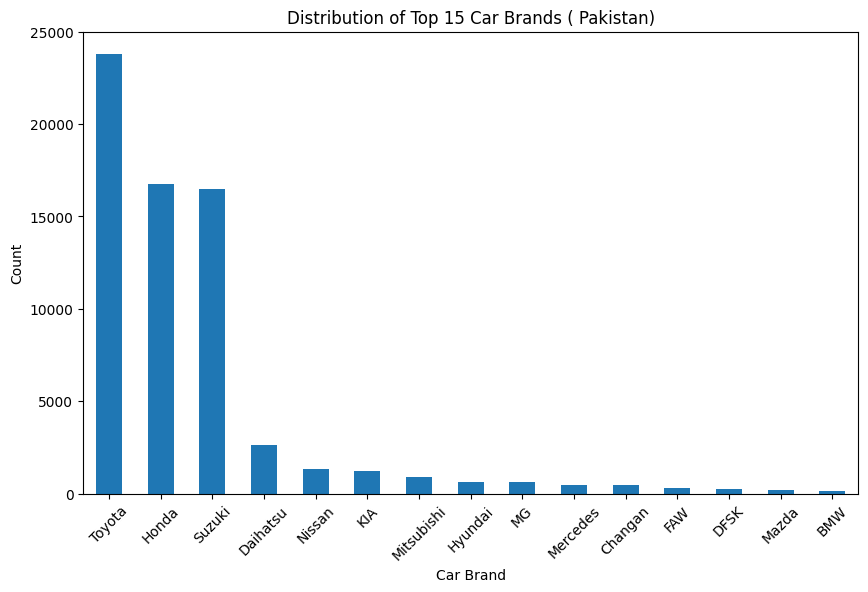

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

brand_distribution = dataPak['Make'].value_counts()

top_15_brands = brand_distribution.head(15)

plt.figure(figsize=(10, 6))
top_15_brands.plot(kind='bar')
plt.title('Distribution of Top 15 Car Brands ( Pakistan)')
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


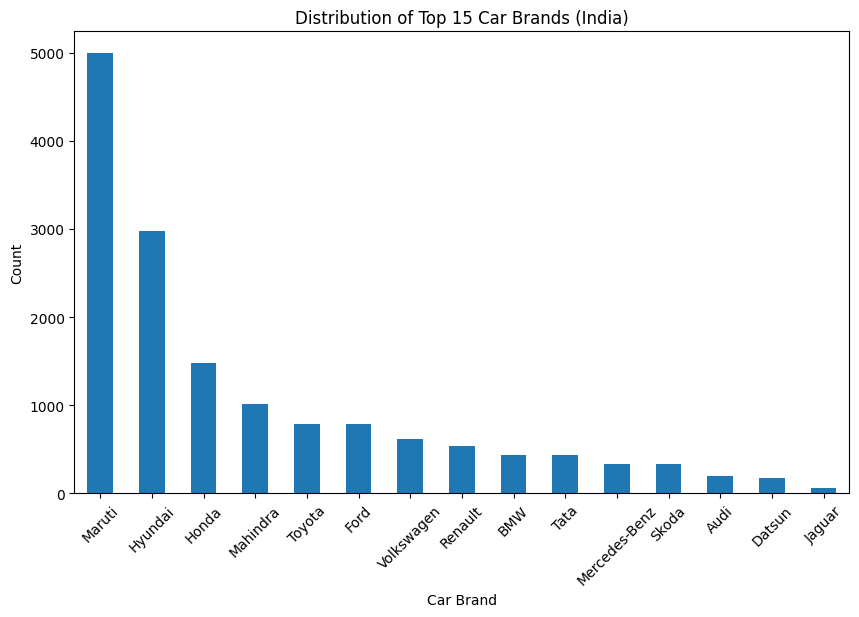

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

brand_distribution = dataIndia['brand'].value_counts()

top_15_brands = brand_distribution.head(15)

plt.figure(figsize=(10, 6))
top_15_brands.plot(kind='bar')
plt.title('Distribution of Top 15 Car Brands (India)')
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


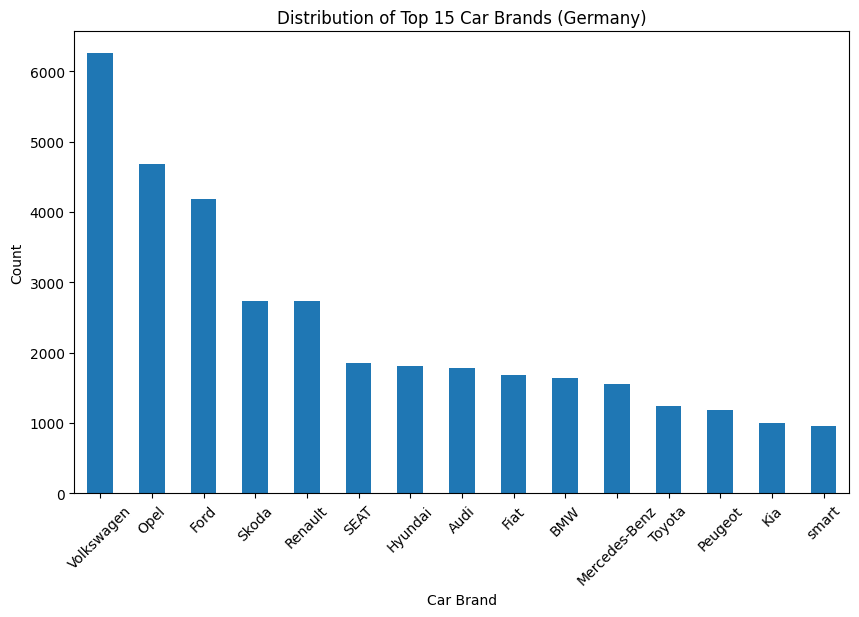

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

brand_distribution = dataGermany['make'].value_counts()

top_15_brands = brand_distribution.head(15)


plt.figure(figsize=(10, 6))
top_15_brands.plot(kind='bar')
plt.title('Distribution of Top 15 Car Brands (Germany)')
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Q2- WHAT IS THE DISTRIBUTION OF FUEL TYPE IN THE THREE DATASETS?

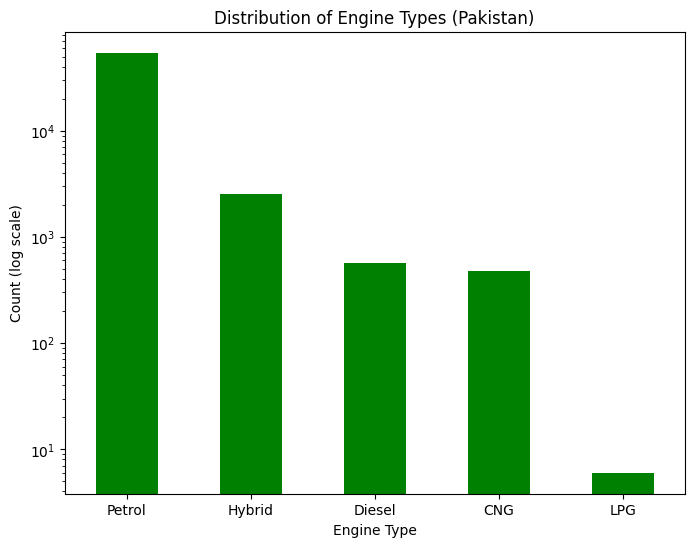

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

engine_distribution = dataPak['Engine Type'].value_counts()


plt.figure(figsize=(8, 6))
engine_distribution.plot(kind='bar' , color ='Green')
plt.title('Distribution of Engine Types (Pakistan)')
plt.xlabel('Engine Type')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()



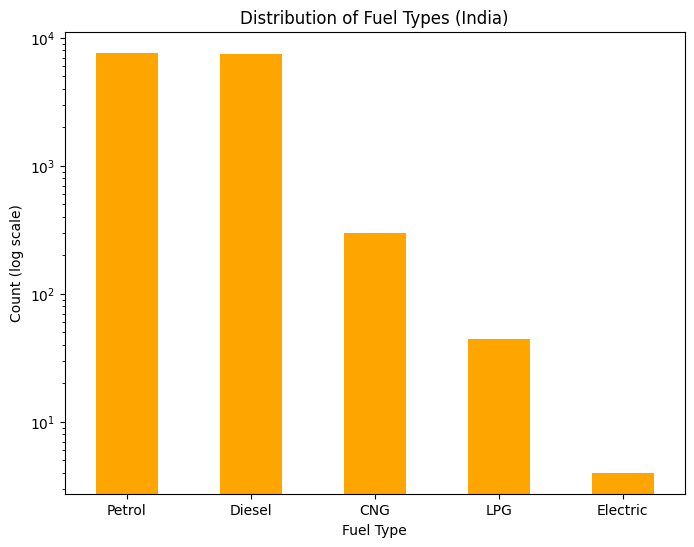

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fuel_distribution = dataIndia['fuel_type'].value_counts()

plt.figure(figsize=(8, 6))
fuel_distribution.plot(kind='bar' , color ='Orange')
plt.title('Distribution of Fuel Types (India)')
plt.xlabel('Fuel Type')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()


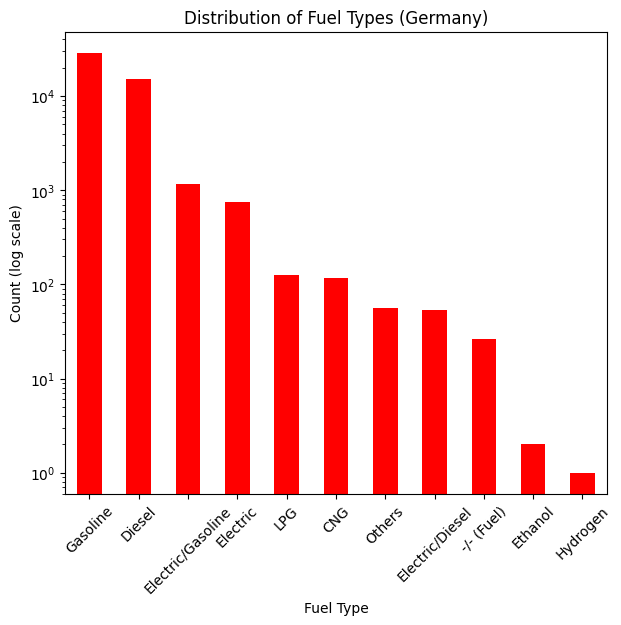

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fuel_distribution = dataGermany['fuel'].value_counts()

plt.figure(figsize=(7, 6))
fuel_distribution.plot(kind='bar' , color ='Red')
plt.title('Distribution of Fuel Types (Germany)')
plt.xlabel('Fuel Type')
plt.ylabel('Count (log scale)')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.xticks(rotation=45)
plt.show()



Q3-IS THERE ANY RELATIONSHIP BETWEEN TRANSMISSION AND PRICE OF THE CARS IN THE THREE DATASETS?

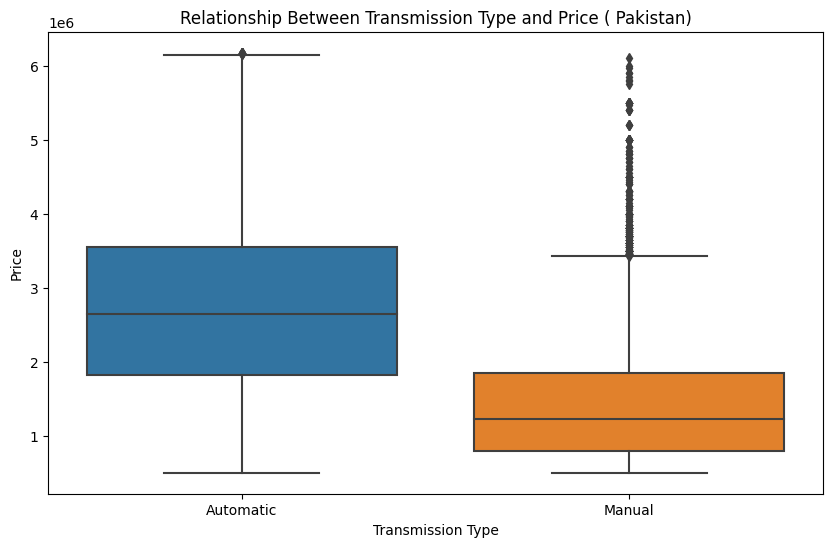

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', data=dataPak)
plt.title('Relationship Between Transmission Type and Price ( Pakistan)')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()


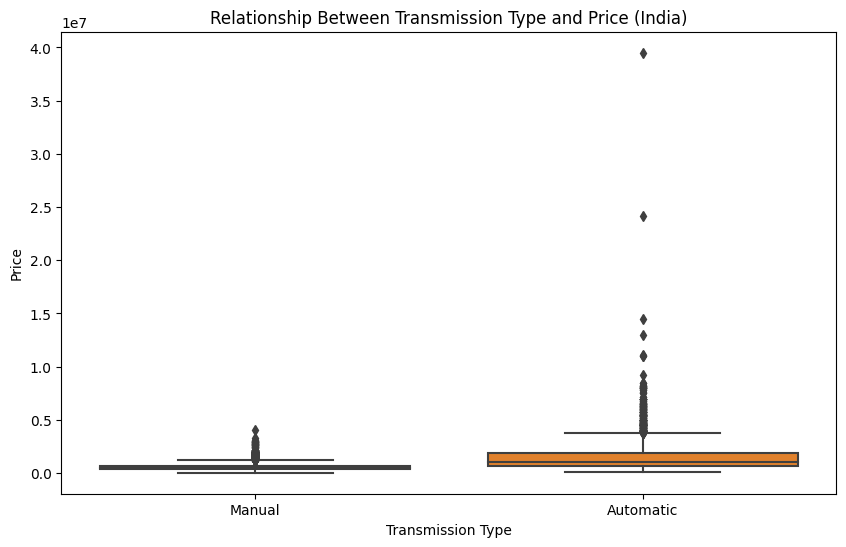

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission_type', y='selling_price', data=dataIndia)
plt.title('Relationship Between Transmission Type and Price (India)')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()


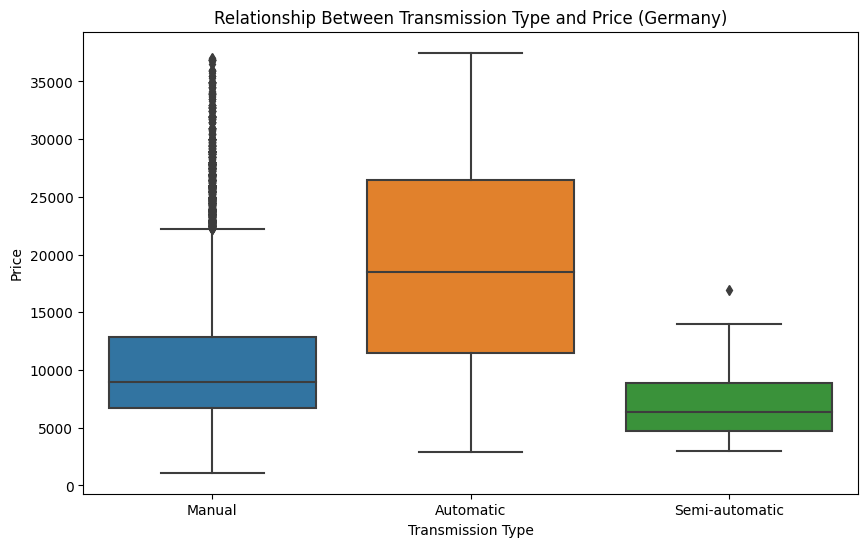

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='gear', y='price', data=dataGermany)
plt.title('Relationship Between Transmission Type and Price (Germany)')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()


Q4-WHAT IS THE DISTRIBUTION OF MILEAGE ACROSS THE DATASETS?

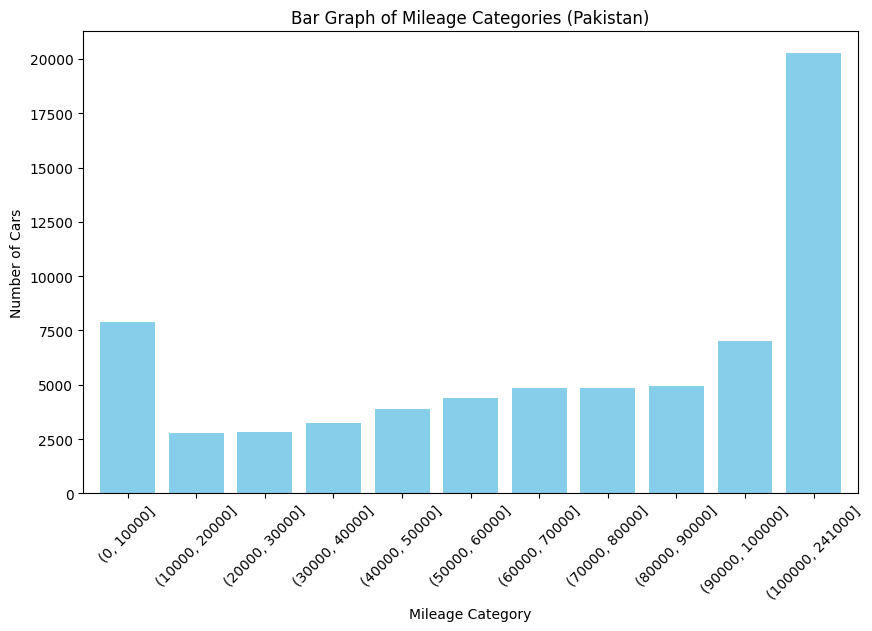

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, dataPak['Mileage(kms)'].max()]
mileage_categories = pd.cut(dataPak['Mileage(kms)'], bins=bins)


mileage_counts = mileage_categories.value_counts().sort_index()


plt.figure(figsize=(10, 6))
mileage_counts.plot(kind='bar', width=0.8, color='skyblue')
plt.title('Bar Graph of Mileage Categories (Pakistan)')
plt.xlabel('Mileage Category')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()



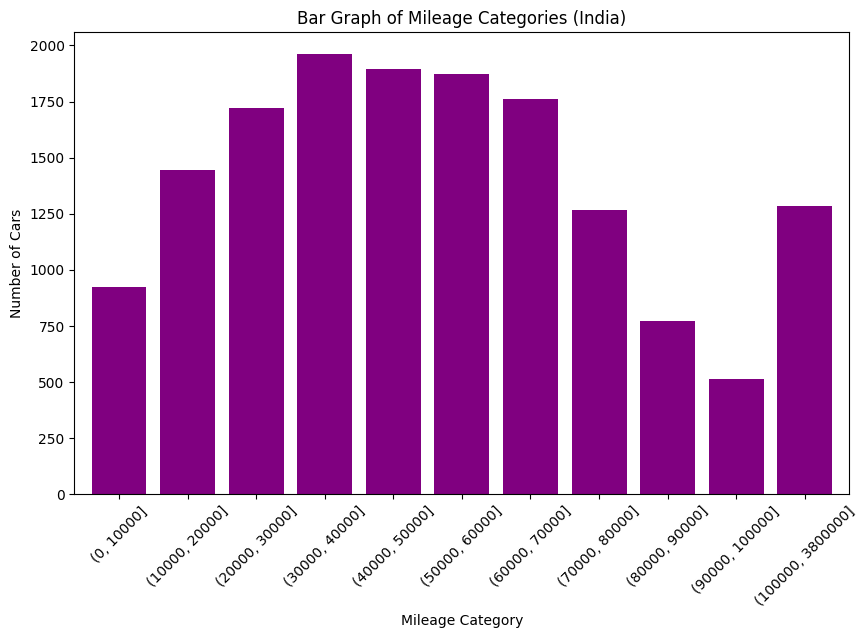

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, dataIndia['km_driven'].max()]
mileage_categories = pd.cut(dataIndia['km_driven'], bins=bins)


mileage_counts = mileage_categories.value_counts().sort_index()


plt.figure(figsize=(10, 6))
mileage_counts.plot(kind='bar', width=0.8, color='purple')
plt.title('Bar Graph of Mileage Categories (India)')
plt.xlabel('Mileage Category')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()


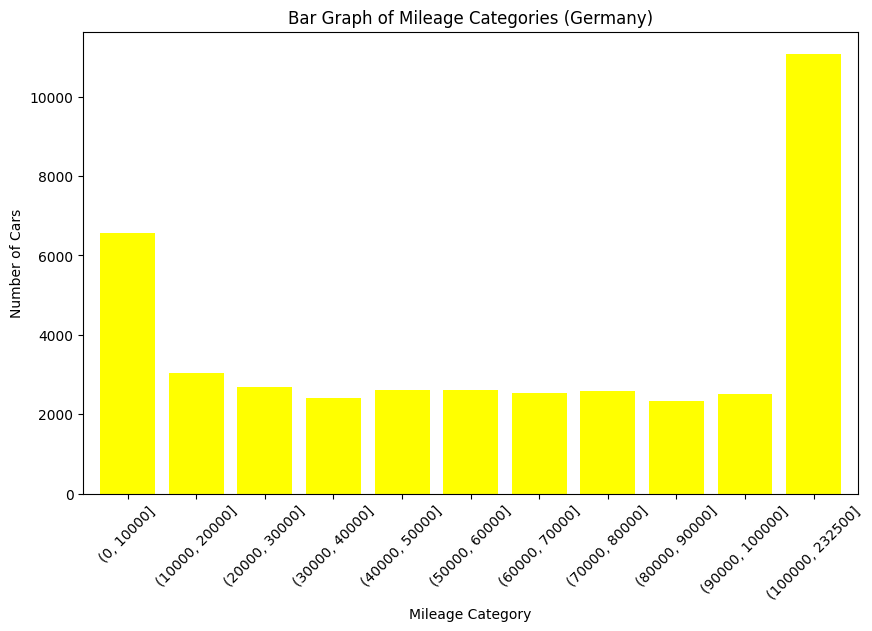

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, dataGermany['mileage'].max()]
mileage_categories = pd.cut(dataGermany['mileage'], bins=bins)


mileage_counts = mileage_categories.value_counts().sort_index()


plt.figure(figsize=(10, 6))
mileage_counts.plot(kind='bar', width=0.8, color='yellow')
plt.title('Bar Graph of Mileage Categories (Germany)')
plt.xlabel('Mileage Category')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()


sam

Q5) HOW DOES AGE OF A VEHICLE AFFECT ITS PRICE IN THE THREE DATASETS?

INDIA DATASET

In [ ]:
vehicle_age1 = dataIndia['vehicle_age']
selling_price1 = dataIndia['selling_price']


In [ ]:
age_bins = [0, 3, 6, 9, 12, 15, 18, 21, float('inf')]
age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22+']

In [ ]:
dataIndia['Age Group'] = pd.cut(vehicle_age1, bins=age_bins, labels=age_labels)

In [ ]:
avg_price2 = dataIndia.groupby('Age Group')['selling_price'].mean()

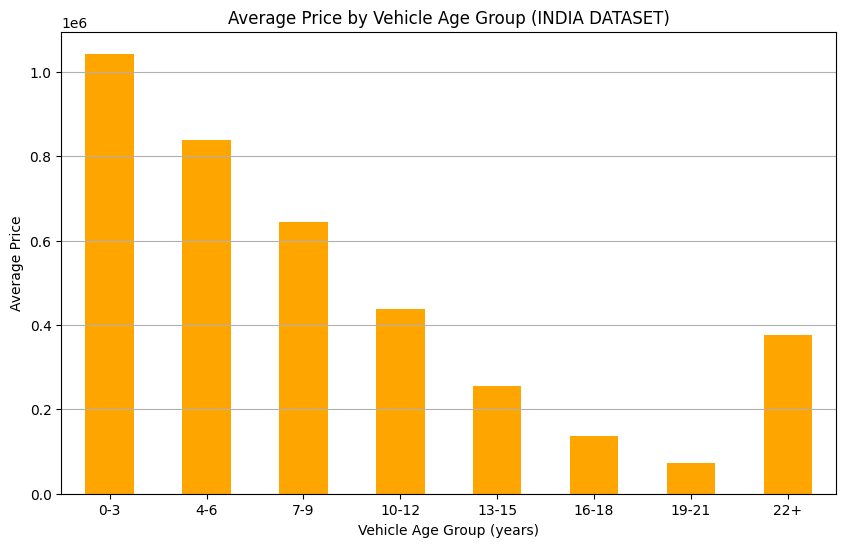

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
avg_price2.plot(kind='bar', rot=0 , color='Orange')
plt.title('Average Price by Vehicle Age Group (INDIA DATASET)')
plt.xlabel('Vehicle Age Group (years)')
plt.ylabel('Average Price')
plt.grid(axis='y')

# Show the plot
plt.show()

PAKISTAN DATASET

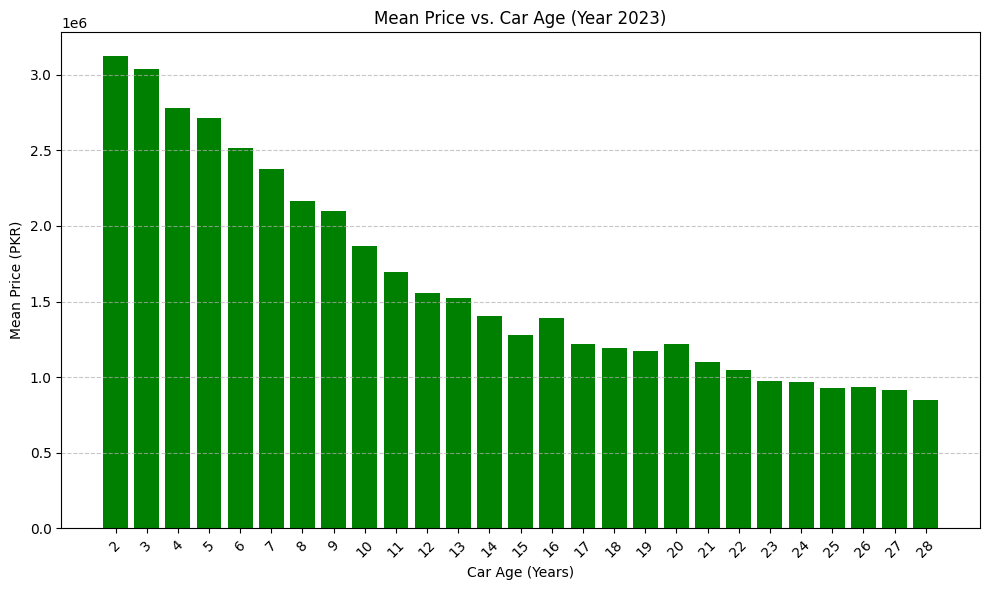

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'pakistan_cars_df' contains the dataset

# Filter the dataset for cars with a manufacturing year in or before 2023
filtered_df = dataPak[dataPak['Year'] <= 2023]

# Calculate the age of each car in 2023
current_year = 2023
filtered_df['Car Age'] = current_year - filtered_df['Year']

# Group the data by car age and calculate the mean price for each age group
age_price_mean = filtered_df.groupby('Car Age')['Price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_price_mean['Car Age'], age_price_mean['Price'], color='Green')
plt.xlabel('Car Age (Years)')
plt.ylabel('Mean Price (PKR)')
plt.title('Mean Price vs. Car Age (Year 2023)')
plt.xticks(age_price_mean['Car Age'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


GERMANY DATASET

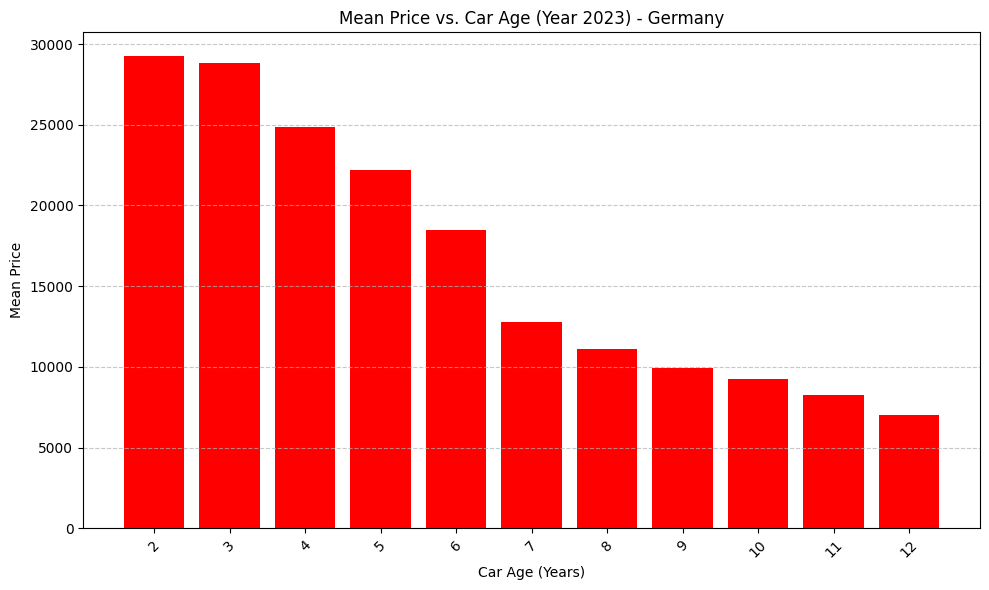

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'germany_cars_df' contains the Germany dataset

# Filter the dataset for cars with a manufacturing year in or before 2023
filtered_df = dataGermany[dataGermany['year'] <= 2023]

# Calculate the age of each car in 2023
current_year = 2023
filtered_df['Car Age'] = current_year - filtered_df['year']

# Group the data by car age and calculate the mean price for each age group
age_price_mean = filtered_df.groupby('Car Age')['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_price_mean['Car Age'], age_price_mean['price'], color='Red')
plt.xlabel('Car Age (Years)')
plt.ylabel('Mean Price')
plt.title('Mean Price vs. Car Age (Year 2023) - Germany')
plt.xticks(age_price_mean['Car Age'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Q6) How does the brand or make of the car affect its price?

INDIA DATASET

In [ ]:
average_prices1 = dataIndia.groupby('brand')['selling_price'].mean().sort_values()


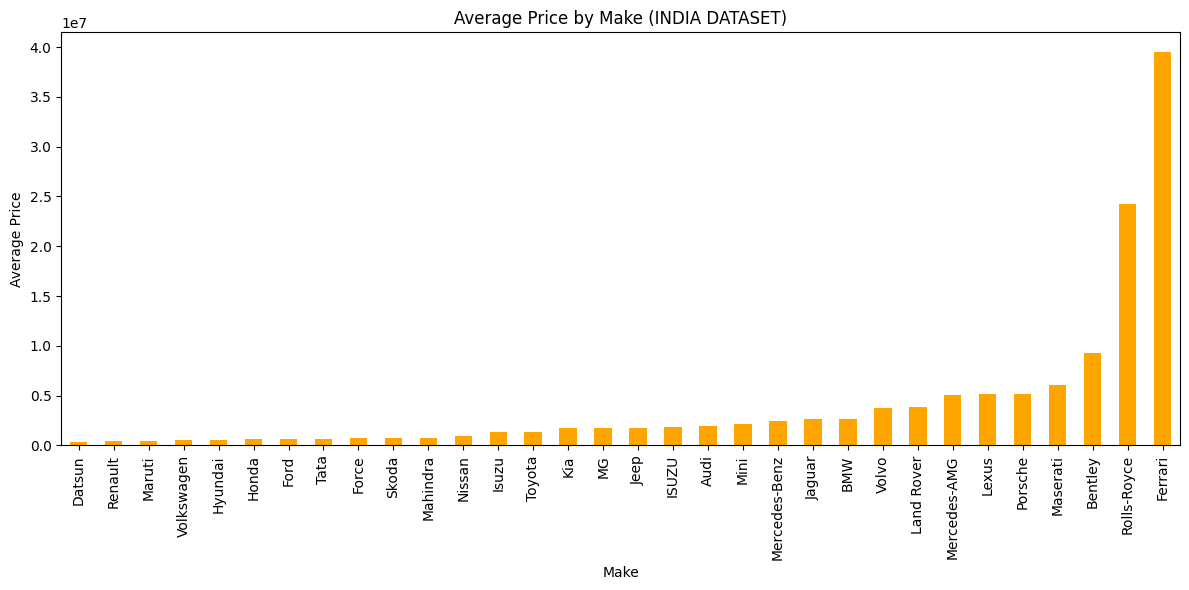

In [ ]:
plt.figure(figsize=(12, 6))
average_prices1.plot(kind='bar', color='Orange')
plt.title('Average Price by Make (INDIA DATASET)')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

PAKISTAN DATA

In [ ]:
average_prices1 = dataPak.groupby('Make')['Price'].mean().sort_values()

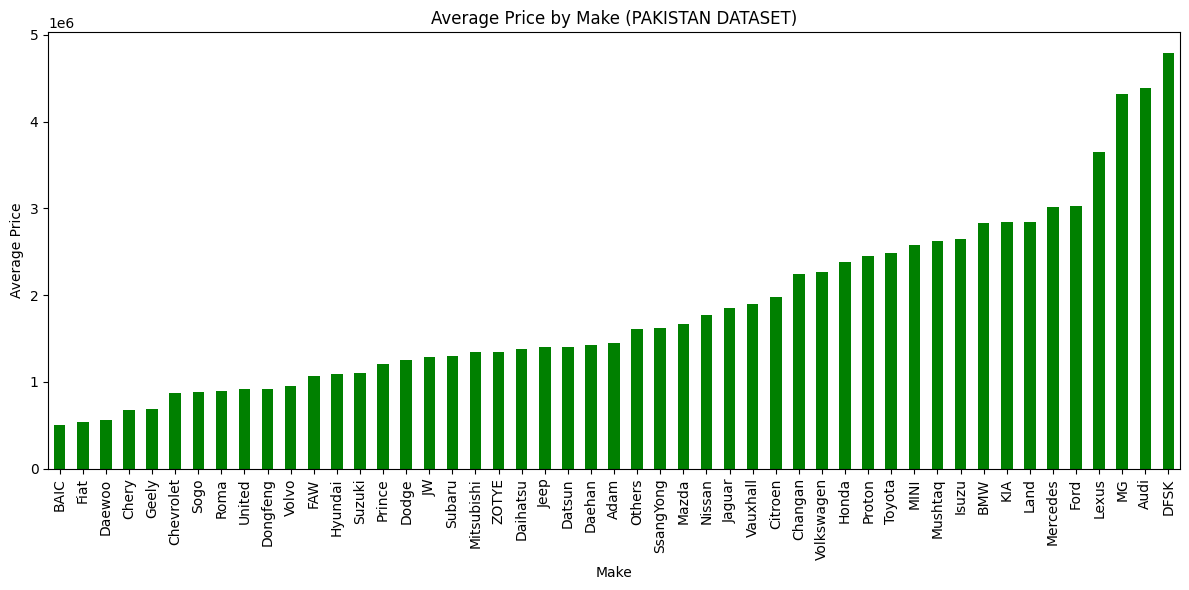

In [ ]:
plt.figure(figsize=(12, 6))
average_prices1.plot(kind='bar', color='green')
plt.title('Average Price by Make (PAKISTAN DATASET)')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

GERMANY DATASET

In [ ]:
average_prices1 =  dataGermany.groupby('make')['price'].mean().sort_values()

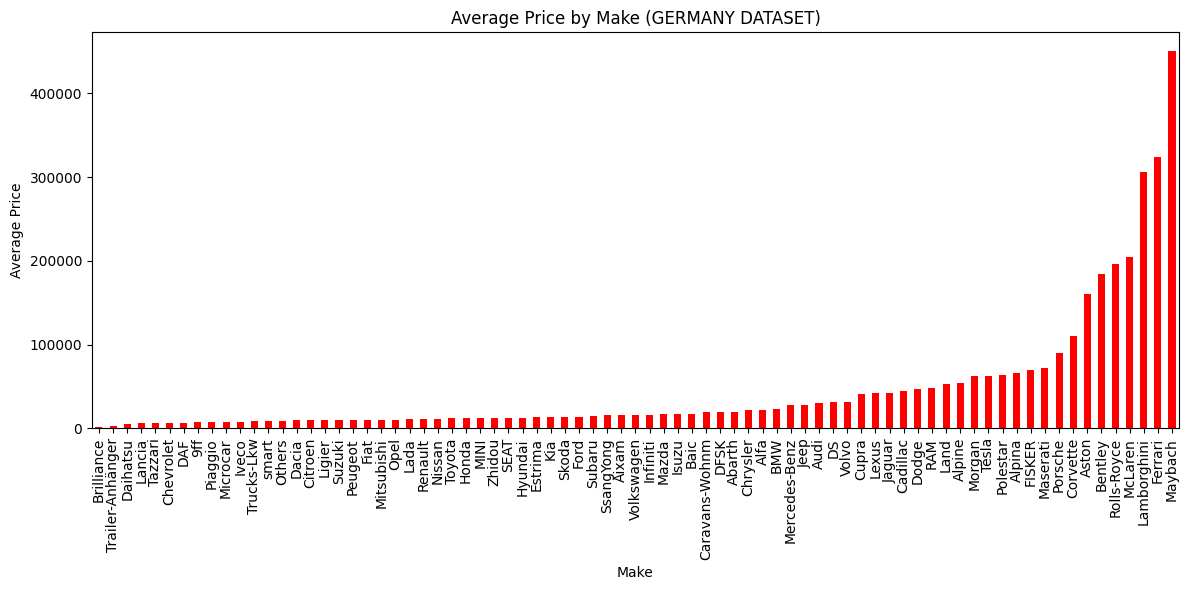

In [ ]:
plt.figure(figsize=(12, 6))
average_prices1.plot(kind='bar', color='red')
plt.title('Average Price by Make (GERMANY DATASET)')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

Q7) What are the top car brands (makes) based on the number of listings in the combined dataset?

INDIA DATASET

In [ ]:
brand_counts_1 = India_data['brand'].value_counts().sort_values(ascending=False)

In [ ]:
top_brands_1 = brand_counts_1.head(10)

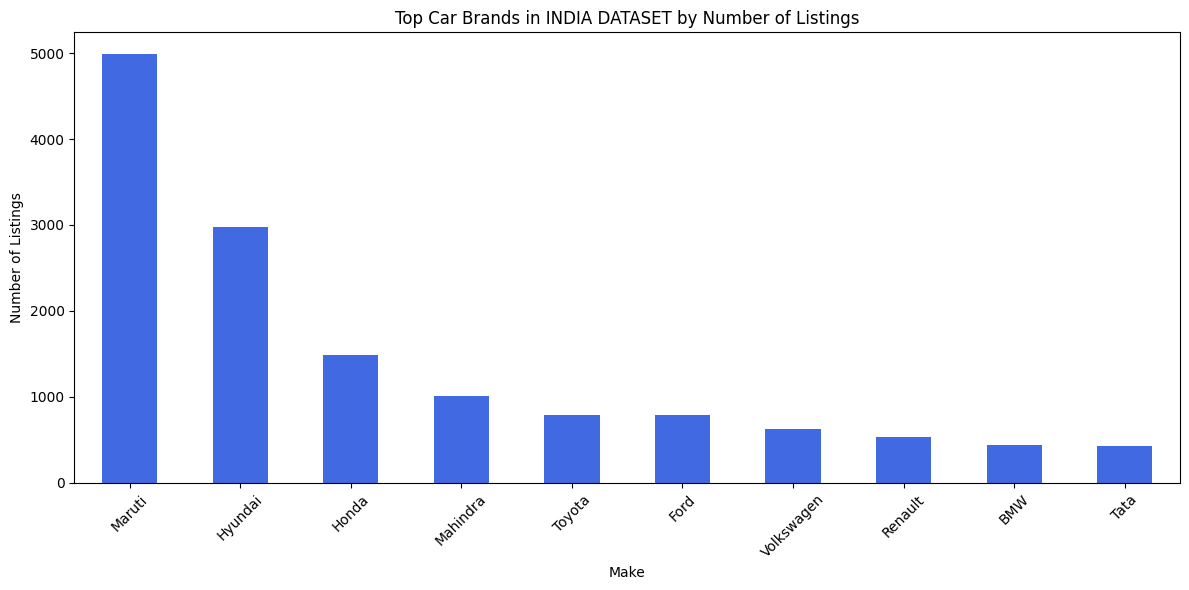

In [ ]:
plt.figure(figsize=(12, 6))
top_brands_1.plot(kind='bar', color='royalblue')
plt.title('Top Car Brands in INDIA DATASET by Number of Listings')
plt.xlabel('Make')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for Dataset 1
plt.show()

PAKISTAN DATASET

In [ ]:
brand_counts_1 = Pak_data['Make'].value_counts().sort_values(ascending=False)

In [ ]:
top_brands_1 = brand_counts_1.head(10)

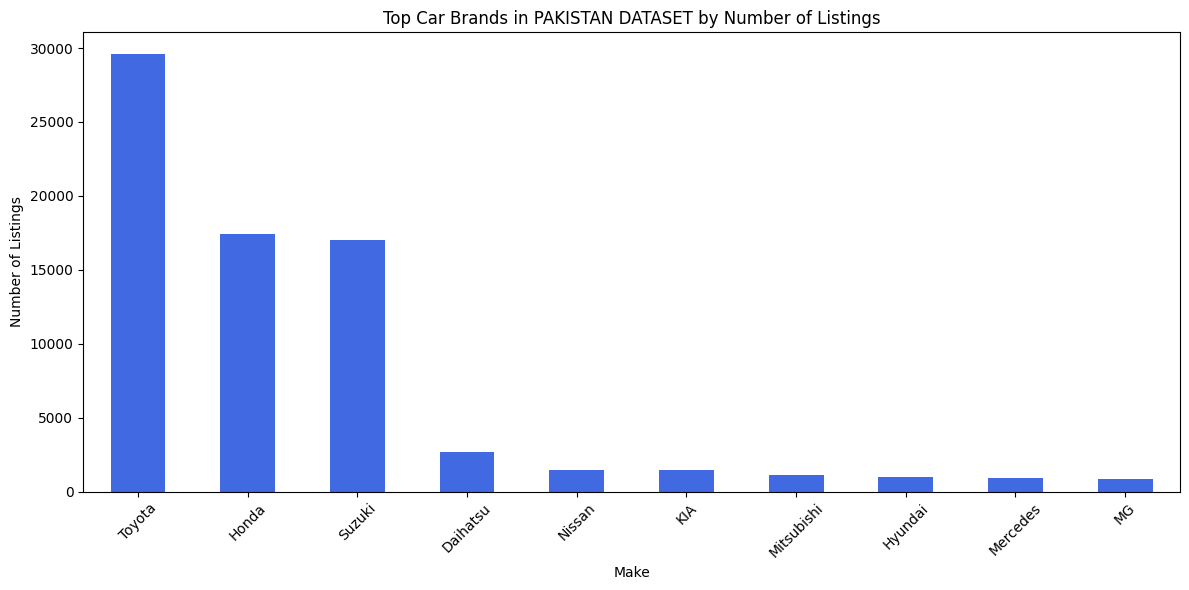

In [ ]:
plt.figure(figsize=(12, 6))
top_brands_1.plot(kind='bar', color='royalblue')
plt.title('Top Car Brands in PAKISTAN DATASET by Number of Listings')
plt.xlabel('Make')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for Dataset 1
plt.show()

GERMANY DATASET

In [ ]:
brand_counts_1 = Germany_data['make'].value_counts().sort_values(ascending=False)

In [ ]:
top_brands_1 = brand_counts_1.head(10)

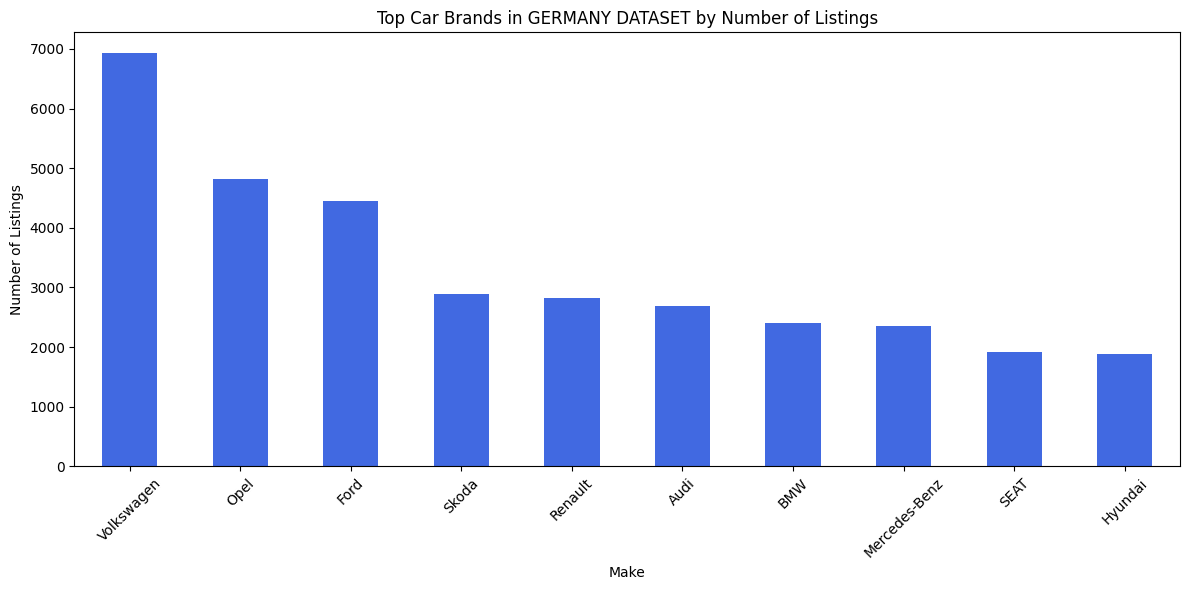

In [ ]:
plt.figure(figsize=(12, 6))
top_brands_1.plot(kind='bar', color='royalblue')
plt.title('Top Car Brands in GERMANY DATASET by Number of Listings')
plt.xlabel('Make')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for Dataset 1
plt.show()